In [1]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

!unzip -u "/content/drive/My Drive/all_data"

Mounted at /content/drive/
Archive:  /content/drive/My Drive/all_data.zip
  inflating: all_data.csv            


In [35]:
import pandas as pd
import os
import numpy as np
from os import listdir
from pickle import dump
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense,Concatenate, TimeDistributed
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras import optimizers
from slugify import slugify
import tensorflow as tf
from pickle import dump,load
import requests
from  urllib3.exceptions import ReadTimeoutError
from urllib.error import HTTPError
from urllib.parse import urlparse
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import spacy
nlp=spacy.load('en_core_web_sm')

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

In [8]:
 news_data=pd.read_csv('all_data.csv',index_col=[0,1]).reset_index(drop=True)

In [9]:
pd.pandas.set_option('display.max_columns', None)

In [10]:
news_data.head(10)

,author,comments,country,crawled,domain_rank,id,language,likes,main_img_url,ord_in_thread,participants_count,published,replies_count,shares,site_url,spam_score,text,thread_title,title,type,uuid,caps_title,caps_thread,caps_text,title_len,thread_len,text_len,excl_title,excl_thread,excl_text,first_title,first_thread,first_text,second_title,second_thread,second_text,third_title,third_thread,third_text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all
0,JEREMY W. PETERS,0.0,US,2017-03-14 08:25:04,0,3.0,english,0.0,https://static01.nyt.com/images/2016/11/23/us/...,0.0,0.0,2016-11-23 00:45:32,0.0,0.0,https://www.nytimes.com/2016/11/22/us/politics...,0.0,"They stood in line at Trump Tower, sometimes u...",0,"At Donald Trump<U+2019>s Properties, a Showcas...",real,f182f05dc3191ba4cb741e22f75fb43b,0,0,0,74,1,6489,0,0,0,2,0,407,0,0,150,0,0,45,9,21,5,6,20,5,14,30,14,52,409,150,45
1,STEVE EDER,0.0,US,2017-03-14 08:25:36,0,4.0,english,0.0,https://static01.nyt.com/images/2016/10/18/us/...,0.0,0.0,2016-10-17 18:46:52,0.0,0.0,https://www.nytimes.com/2016/10/18/us/politics...,0.0,Donald J. Trump <U+2019>s foundation informed ...,0,Trump Foundation Tells New York It Has Stopped...,real,220b87845a5eb01509b66c8008bf3728,0,0,0,75,1,2163,0,0,0,5,0,140,0,0,38,2,0,26,6,7,2,4,4,4,5,9,8,15,145,38,28
2,MAGGIE HABERMAN ASHLEY PARKER,0.0,US,2017-03-14 08:25:36,0,5.0,english,0.0,https://static01.nyt.com/images/2016/11/12/us/...,0.0,0.0,2016-11-12 02:08:39,0.0,0.0,https://www.nytimes.com/2016/11/12/us/politics...,0.0,President-elect Donald J. Trump won the White ...,0,"Donald Trump Prepares for White House Move, bu...",real,247e97e1da2dc67fcb31e20b84b2d960,0,0,1,74,1,6239,0,0,1,4,0,436,1,0,167,1,0,67,5,19,6,8,15,8,6,26,15,34,440,168,68
3,NELSON D. SCHWARTZ SUI-LEE WEE,0.0,US,2017-03-14 08:25:36,0,6.0,english,0.0,https://static01.nyt.com/images/2016/10/21/bus...,0.0,0.0,2016-10-20 22:09:04,0.0,0.0,https://www.nytimes.com/2016/10/21/business/in...,0.0,An investment pitch for a new Texas hotel is t...,0,Luring Chinese Investors With Trump<U+2019>s N...,real,e1f572512a36071cbca6056a31577389,0,0,13,59,1,7894,0,0,0,6,0,586,0,0,136,2,0,69,11,14,6,10,10,10,6,32,24,43,592,136,71
4,MAGGIE HABERMAN,0.0,US,2017-03-14 08:25:37,0,7.0,english,0.0,https://static01.nyt.com/images/2016/11/21/us/...,0.0,0.0,2016-11-21 01:42:23,0.0,0.0,https://www.nytimes.com/2016/11/21/us/politics...,0.0,President-elect Donald J. Trump <U+2019>s wife...,0,Melania and Barron Trump Won<U+2019>t Immediat...,real,584700e476e0d3c20731cb3d28e6ce2b,0,0,0,62,1,2979,0,0,0,7,0,216,0,0,82,1,0,27,1,12,0,3,6,2,4,14,4,25,223,82,28
5,ERIC LIPTON,0.0,US,2017-03-14 08:25:39,0,8.0,english,0.0,https://static01.nyt.com/images/2016/11/19/us/...,0.0,0.0,2016-11-18 20:19:01,0.0,0.0,https://www.nytimes.com/2016/11/19/us/politics...,0.0,WASHINGTON <U+2014> The potential for conflict...,0,Ivanka Trump<U+2019>s Presence at Meeting With...,real,942acc1236380258351ad1be8430c5f9,0,0,1,71,1,5016,0,0,0,6,0,357,0,0,91,1,0,32,4,10,1,3,8,3,6,20,12,34,363,91,33
6,THE ASSOCIATED PRESS,0.0,US,2017-03-14 08:25:40,0,9.0,english,0.0,https://t4.rbxcdn.com/c5695e5f087535e2066dc473...,0.0,0.0,2016-11-11 03:48:00,0.0,0.0,https://www.nytimes.com/2016/11/11/us/trump-la...,0.0,SAN DIEGO <U+2014> Donald J. Trump <U+2019>s l...,0,Trump Lawyers Agree to Settlement Talks in Uni...,real,020eb703a09a706f12aaa0b26fca080e,0,0,2,58,1,2031,0,0,0,5,0,133,0,0,32,2,0,17,10,10,4,8,1,5,5,9,12,13,138,32,19
7,SARAH MASLIN NIR,0.0,US,2017-03-14 08:25:41,0,10.0,english,0.0,https://static01.nyt.com/images/2016/11/17/nyr...,0.0,0.0,2016-11-17 02:44:08,0.0,0.0,https://www.nytimes.com/2016/11/17/nyregion/do...,0.0,All Karen Hendrickson wanted was the latest po...,0,"With Trump Using Tower as Base, Fifth Avenue G...",real,2d174c9fed75f90c754d59b7adb466a3,0,0,0,61,1,7626,0,0,3,5,0,536,0,0,159,1,0,62,16,25,9,23,17,14,14,37,30,46,541,159,63
8,VIVIAN YEE,0.0,US,2017-03-14 08:25:42,0,11.0,english,0.0,https://sta

In [11]:
news_data = news_data.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)

In [12]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20015 entries, 0 to 20014
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author              20015 non-null  object 
 1   comments            16844 non-null  float64
 2   country             20015 non-null  object 
 3   crawled             16844 non-null  object 
 4   domain_rank         20015 non-null  int64  
 5   id                  4903 non-null   float64
 6   language            16844 non-null  object 
 7   likes               16844 non-null  float64
 8   main_img_url        20015 non-null  object 
 9   ord_in_thread       16844 non-null  float64
 10  participants_count  16844 non-null  float64
 11  published           13514 non-null  object 
 12  replies_count       16844 non-null  float64
 13  shares              16844 non-null  float64
 14  site_url            16844 non-null  object 
 15  spam_score          16844 non-null  float64
 16  text

In [13]:
news_data["language"].value_counts()

english       16252
russian         203
spanish         172
german          111
french           37
arabic           22
portuguese       11
turkish          10
italian           9
greek             4
ignore            4
dutch             3
norwegian         3
finnish           1
chinese           1
polish            1
Name: language, dtype: int64

In [14]:
news_data=news_data[news_data['language']=='english']

In [15]:
news_data["language"].value_counts()

english    16252
Name: language, dtype: int64

In [16]:
news_data["main_img_url"][0]

'https://static01.nyt.com/images/2016/11/23/us/23spectacle1/23spectacle1-master768.jpg'

In [17]:
news_data=news_data[["type","text","title","main_img_url"]].reset_index(drop=True)

In [18]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          16252 non-null  object
 1   text          16252 non-null  object
 2   title         16252 non-null  object
 3   main_img_url  16252 non-null  object
dtypes: object(4)
memory usage: 508.0+ KB


In [19]:
news_data_samp=news_data.sample(1000,random_state=42)

In [20]:
from requests.exceptions import ConnectionError
def check_url_exists(url: str):
    """
    Checks if a url exists
    :param url: url to check
    :return: True if the url exists, false otherwise.
    """
    # print(url)
    return requests.head(url, allow_redirects=True).status_code == 200
   

In [22]:
def is_url_image(image_url):
   image_formats = ("image/png", "image/jpeg", "image/jpg")
   r = requests.head(image_url)
   if r.headers.get("content-type",'') in image_formats:
      return True
   return False

In [23]:
def uri_validator(x):
    try:
        result = urlparse(x)
        return all([result.scheme, result.netloc])
    except:
        return False


In [24]:
from requests.exceptions import SSLError
# for i,url in enumerate(news_data_samp['main_img_url']):
#     res=uri_validator(url)
#     if(res==False): 
#         news_data_samp.drop(news_data_samp.index[i:i+1], inplace=True)
#     # else:
#     #     resp=check_url_exists(url) 
#     #     if(resp==False):
#     #        news_data_samp.drop(news_data_samp.index[i:i+1], inplace=True)
#     else:
#              try:
#                response = requests.head(url, allow_redirects=True)
#              except (SSLError, ConnectionError):
#                news_data_samp.drop(news_data_samp.index[i:i+1], inplace=True)
#                print("print",i)
#                continue

In [25]:
news_data_samp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 304 to 15710
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1000 non-null   object
 1   text          1000 non-null   object
 2   title         1000 non-null   object
 3   main_img_url  1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [26]:
news_data_samp_cp=news_data_samp

In [27]:
news_data_samp.to_csv("news_allData.csv",index=False)

In [252]:
df=pd.read_csv("news_allData.csv")

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1000 non-null   object
 1   text          1000 non-null   object
 2   title         1000 non-null   object
 3   main_img_url  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [254]:
df.isnull().sum()

type            0
text            0
title           0
main_img_url    0
dtype: int64

In [232]:
# df=df.sample(30,random_state=42).reset_index(drop=True)

In [233]:
# df.info()

In [255]:
df["main_img_url"][109]

'https://si.wsj.net/public/resources/images/BN-QT698_RETIRE_GR_20161111150210.jpg'

In [256]:
df["text"][109]

'During a presidential campaign in which few topics were off-limits, Donald Trump didn<U+2019>t say much about retirement policy. But retirement-policy experts say the few comments the president-elect has made about Social Security<U+2014>along with congressional Republicans<U+2019> proposals aimed at tweaking retirement plans<U+2014>provide some clues as to what to expect. So far, Mr. Trump has said he has no plans to cut Social Security benefits or raise the payroll taxes that support the program. <U+201C>Our goal is to keep the promises made to Americans through our Social Security program,<U+201D> Mr. Trump wrote in response to an invitation from AARP, the advocacy group for older Americans, to both presidential candidates to outline their positions on making <U+201C>Social Security financially sound for future generations.<U+201D> Mr. Trump predicted that his plans to boost economic growth would shore up Social Security<U+2019>s finances. Currently, the program<U+2019>s trustees p

In [257]:
def saving_img(img_url,i):
   ext=str(img_url).split(".")[-1]
   print(ext,"ext")
  
   format = 'JPEG' if ext.lower() == 'jpg' else ext.upper()
   print(img_url,str(img_url).split(".")[-1],"extt")
   response = requests.get(img_url,timeout=5)
   if response.status_code:
      #  pil_im = Image.fromarray(response.raw)
      #  b = io.BytesIO()
      #  im_bytes = b.getvalue()
      #  dataBytesIO = io.BytesIO(im_bytes)
       img = Image.open(BytesIO(response.content))
       if img.mode in ("RGBA", "P"):
        img = img.convert("RGB")
      #  f"sample_image.{extension}"
       img.save("images_new/"+str(i)+f"{slugify(img_url[0:100])}.{ext}",format)
      #  fp = open("images_new/"+str(i)+slugify(img_url[0:100] ), 'wb')
      #  fp.write(response.content)
      #  fp.close()
       print("saving",i)

In [258]:
# import shutil
# import os

# directory = "/content/images_new"
# files_in_directory = os.listdir(directory)

# for file in files_in_directory:
#     try:
#         path_to_file_or_folder = os.path.join(directory, file)
#         shutil.rmtree(path_to_file_or_folder)
#     except:
#         os.unlink(path_to_file_or_folder)

In [398]:
delete_index=[]
for i,url in enumerate(df["main_img_url"]):
    #  res=is_url_image(url)
    #  if(res==False):
    #    print(i,"print")
    #    df.drop(df.index[i:i+1], inplace=True)
    #    continue
     try:
       res=is_url_image(url)
       if(res==False):
          print(i,"print")
          # df.drop(df.index[i:i+1], inplace=True)
          delete_index.append(i)
          continue
       response = requests.head(url, allow_redirects=True)
       saving_img(url,i)
     except (SSLError,KeyError, ConnectionError,requests.exceptions.MissingSchema, ReadTimeoutError,requests.exceptions.Timeout):
      #  df.drop(df.index[i:i+1], inplace=True)
       delete_index.append(i)
       print("print",i)
       continue
     

jpg ext
https://static01.nyt.com/images/2016/11/18/opinion/18fri1/18fri1-master768.jpg jpg extt
saving 0
1 print
jpg ext
https://si.wsj.net/public/resources/images/BN-QO646_riley1_GR_20161101171836.jpg jpg extt
saving 2
jpg ext
https://si.wsj.net/public/resources/images/BN-QZ824_1130ri_GR_20161130094426.jpg jpg extt
saving 3
4 print
jpg ext
https://static01.nyt.com/images/2016/11/04/upshot/04UP-Electorate/04UP-Electorate-master768.jpg jpg extt
saving 5
jpg ext
https://static01.nyt.com/images/2016/11/14/world/SYRIA/SYRIA-master768.jpg jpg extt
saving 6
7 print
8 print
print 9
jpg ext
https://static01.nyt.com/images/2016/11/13/business/13VIEW/13VIEW-master768.jpg jpg extt
saving 10
11 print
12 print
13 print
14 print
15 print
jpg ext
https://si.wsj.net/public/resources/images/BN-QE058_PERSUA_GR_20161007165216.jpg jpg extt
saving 16
17 print
jpg ext
http://endoftheamericandream.com/wp-content/uploads/2016/07/Planet-Earth-Globe-Space-Public-Domain-460x259.jpg jpg extt
saving 18
jpg ext
htt

In [33]:
!unzip -u "/content/drive/MyDrive/news_images/news_images"

Archive:  /content/drive/MyDrive/news_images/news_images.zip


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1000 non-null   object
 1   text          1000 non-null   object
 2   title         1000 non-null   object
 3   main_img_url  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [399]:
len(delete_index)

761

In [485]:
df_cp=df.copy()

In [486]:
df_cp.drop(delete_index, inplace=True)

In [487]:
df_cp=df_cp.reset_index(drop=True)

In [488]:
df_cp

,type,text,title,main_img_url
0,real,President-elect Donald Trump says he will move...,Donald Trump<U+2019>s Plan to Purge the Nation,https://static01.nyt.com/images/2016/11/18/opi...
1,real,One measure of the heat and light of this year...,Venture Investors on the Election: Bring. It. ...,https://si.wsj.net/public/resources/images/BN-...
2,real,President-elect Donald Trump said Wednesday th...,Trump Chooses Chicago Cubs Co-Owner Todd Ricke...,https://si.wsj.net/public/resources/images/BN-...
3,real,Donald J. Trump and his supporters hope to ove...,Donald Trump Can<U+2019>t Count on Those <U+20...,https://static01.nyt.com/images/2016/11/04/ups...
4,real,"BEIRUT, Lebanon <U+2014> The hours are ticking...","Syrian Rebels Brace for a Trump Cutoff, and Lo...",https://static01.nyt.com/images/2016/11/14/wor...
...,...,...,...,...
234,real,"Last chance, no backsies. The third and final ...",Debate Takeaways: Donald Trump Had a Lot to Do...,https://static01.nyt.com/images/2016/10/21/us/...
235,real,Donald Trump upended U.S. politics and global ...,Traders Salivate as Volatility Returns - WSJ,https://si.wsj.net/public/resources/images/MI-...
236,real,A former writer for People magazine wrote in a...,Writer for People Magazine Describes Forced Ki...,https://static01.nyt.com/images/2016/10/13/us/...
237,real,PHOENIX<U+2014>Republican Sen. John McCain won...,John McCain Wins Arizona Senate Race - WSJ,https://si.wsj.net/public/resources/images/BN-...


In [234]:
df_cp["type"].value_counts()

real    152
fake     87
Name: type, dtype: int64

In [260]:
# dir_path = "/content/images_new"
dir_path="/content/content/images_new"
count = 0
ima=[]
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
       ima.append(path)
print('File count:', len(ima))        

File count: 239


In [261]:
index=[]
for i,path in enumerate(ima):
   ind=ima[i].split('h')[0]
   index.append(ind)

In [262]:
index=sorted(index,key=int)

In [263]:
df=df.iloc[index]

In [239]:
import glob
import re
sort_files=[]
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join(dir_path, x)),
                        os.listdir(dir_path) ) ,key=lambda s: int(re.search(r'\d+', s).group()))
for file_name in list_of_files:
   sort_files.append(file_name)

In [264]:
sort_files

['0https-static01-nyt-com-images-2016-11-18-opinion-18fri1-18fri1-master768-jpg.jpg',
 '2https-si-wsj-net-public-resources-images-bn-qo646-riley1-gr-20161101171836-jpg.jpg',
 '3https-si-wsj-net-public-resources-images-bn-qz824-1130ri-gr-20161130094426-jpg.jpg',
 '5https-static01-nyt-com-images-2016-11-04-upshot-04up-electorate-04up-electorate-master768-jpg.jpg',
 '6https-static01-nyt-com-images-2016-11-14-world-syria-syria-master768-jpg.jpg',
 '10https-static01-nyt-com-images-2016-11-13-business-13view-13view-master768-jpg.jpg',
 '16https-si-wsj-net-public-resources-images-bn-qe058-persua-gr-20161007165216-jpg.jpg',
 '18http-endoftheamericandream-com-wp-content-uploads-2016-07-planet-earth-globe-space-public-domain-4.jpg',
 '19https-si-wsj-net-public-resources-images-bn-qq640-votele-gr-20161106145244-jpg.jpg',
 '22https-si-wsj-net-public-resources-images-bn-qx878-1124bo-gr-20161123111614-jpg.jpg',
 '25https-static01-nyt-com-images-2016-11-26-us-27clinton-27clinton-master768-jpg.jpg',
 

In [241]:

# example of converting an image with the Keras API
from PIL import Image
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
import io
import cv2

In [421]:
def extract_features(directory):
 # load the model
 model = VGG16()
 # re-structure the model
 model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
 # summarize
 print(model.summary())
 # extract features from each photo
 features = dict()
 for name in sort_files:
 # load an image from file
  print(name,"name")
  if not name.startswith('.'):
   filename = directory + '/' + name
   print(filename,"file")
   image = load_img(filename, target_size=(224, 224))
 # convert the image pixels to a numpy array
   image = img_to_array(image)
 # reshape data for the model
   image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
 # prepare the image for the VGG model
   image = preprocess_input(image)
 # get features
   feature = model.predict(image, verbose=0)
 # get image id
   image_id = name.split('.')[0]
 # store feature
   features[image_id] = feature
   print('>%s' % name)
 return features

In [424]:
# extract features from all images
directory = dir_path
features = extract_features(directory)
print('Extracted Features: %d' % len(features))


Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [425]:
dump(features, open('features.pkl', 'wb'))

In [426]:
# !zip -r /content/news_images.zip /content/images_new

In [427]:
# !cp /content/news_images.zip /content/drive/MyDrive/news_images/

In [ ]:
  # files.download('/content/images.zip')

In [265]:
def preprocess(text):
    text = text.lower()
    text = ''.join(c for c in text if not c.isdigit()) #remove digits.
    stop_words = stopwords.words('english') # removes words which has less meaning 
    text = ' '.join([w for w in nltk.word_tokenize(text) if not w in stop_words])
    wordnet_lemmatizer = WordNetLemmatizer() # with use of morphological analysis of words
    text = [wordnet_lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)]
    text = " ".join(w for w in text)
    return text

In [266]:
import string

# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(str(key) + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()




In [267]:
import re

# Remove non-alphabetic characters (Data Cleaning)
def text_strip(column):
    print(column)
    for row in column:
        row = re.sub("(\\t)", " ", str(row)).lower()
        row = re.sub("(\\r)", " ", str(row)).lower()
        row = re.sub("(\\n)", " ", str(row)).lower()

        # Remove _ if it occurs more than one time consecutively
        row = re.sub("(__+)", " ", str(row)).lower()

        # Remove - if it occurs more than one time consecutively
        row = re.sub("(--+)", " ", str(row)).lower()

        # Remove ~ if it occurs more than one time consecutively
        row = re.sub("(~~+)", " ", str(row)).lower()

        # Remove + if it occurs more than one time consecutively
        row = re.sub("(\+\++)", " ", str(row)).lower()

        # Remove . if it occurs more than one time consecutively
        row = re.sub("(\.\.+)", " ", str(row)).lower()

        # Remove the characters - <>()|&©ø"',;?~*!
        row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", str(row)).lower()

        # Remove mailto:
        row = re.sub("(mailto:)", " ", str(row)).lower()

        # Remove \x9* in text
        row = re.sub(r"(\\x9\d)", " ", str(row)).lower()

        # Replace INC nums to INC_NUM
        row = re.sub("([iI][nN][cC]\d+)", "INC_NUM", str(row)).lower()

        # Replace CM# and CHG# to CM_NUM
        row = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", "CM_NUM", str(row)).lower()

        # Remove punctuations at the end of a word
        row = re.sub("(\.\s+)", " ", str(row)).lower()
        row = re.sub("(\-\s+)", " ", str(row)).lower()
        row = re.sub("(\:\s+)", " ", str(row)).lower()

        # Replace any url to only the domain name
        try:
            url = re.search(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", str(row))
            repl_url = url.group(3)
            row = re.sub(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", repl_url, str(row))
        except:
            pass

        # Remove multiple spaces
        row = re.sub("(\s+)", " ", str(row)).lower()

        # Remove the single character hanging between any two spaces
        row = re.sub("(\s+.\s+)", " ", str(row)).lower()

        yield row

In [268]:
df_cp=df.copy()

In [269]:
df_cp=df_cp.reset_index(drop=True)

In [270]:
df_cp["title"]=df_cp["title"].apply(preprocess)

In [271]:
descriptions=text_strip(df_cp["title"])

In [272]:
descriptions = ['starttoken '+ str(doc) + ' endtoken' for doc in nlp.pipe(descriptions, batch_size=100)]

0                  donald trump < u+ > plan purge nation
1          venture investor election : bring . . . - wsj
2      trump chooses chicago cub co-owner todd ricket...
3      donald trump < u+ > count < u+ > missing white...
4      syrian rebel brace trump cutoff , look silver ...
                             ...                        
234          debate takeaway : donald trump lot , < u+ >
235              trader salivate volatility return - wsj
236    writer people magazine describes forced kiss t...
237            john mccain win arizona senate race - wsj
238                        trump < u+ > pivot asia - wsj
Name: title, Length: 239, dtype: object


In [274]:
df_cp["clean_title"]=descriptions

In [275]:
df_cp["sorted_imgs"]=sort_files

In [276]:
df_cp["sorted_imgs"][7]

'18http-endoftheamericandream-com-wp-content-uploads-2016-07-planet-earth-globe-space-public-domain-4.jpg'

In [277]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          239 non-null    object
 1   text          239 non-null    object
 2   title         239 non-null    object
 3   main_img_url  239 non-null    object
 4   clean_title   239 non-null    object
 5   sorted_imgs   239 non-null    object
dtypes: object(6)
memory usage: 11.3+ KB


In [210]:
df_cp[df_cp["sorted_imgs"]=="18http-endoftheamericandream-com-wp-content-uploads-2016-07-planet-earth-globe-space-public-domain-4"]

,type,text,title,main_img_url,clean_title,sorted_imgs
7,fake,Archives Michael<U+2019>s Latest Video End Tim...,: end time persecution : russia banned evangel...,http://endoftheamericandream.com/wp-content/up...,starttoken end time persecution russia banned ...,18http-endoftheamericandream-com-wp-content-up...


In [278]:
df_cp["clean_title"][22]

'starttoken newsnight trolled tory mp called bbc play god save queen end day endtoken'

In [279]:
df_cp["text"][22]

"Next Swipe left/right Newsnight trolled the Tory MP who called for the BBC to play God Save The Queen at the end of each day MP for Romford Andrew Rosindell recently said the BBC should be <U+201C>unashamedly British<U+201D> and celebrate the UK<U+2019>s exit from the EU by playing God Save The Queen every night. Newsnight duly obliged, but not the version he was thinking of. By popular demand, here's our playout from last night<U+2026> pic.twitter.com/0woMdwAlmi \n<U+2014> BBC Newsnight (@BBCNewsnight) November 4, 2016"

In [280]:
real_news_df=df_cp[df_cp["type"]=="real"]

In [281]:
real_news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 238
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          152 non-null    object
 1   text          152 non-null    object
 2   title         152 non-null    object
 3   main_img_url  152 non-null    object
 4   clean_title   152 non-null    object
 5   sorted_imgs   152 non-null    object
dtypes: object(6)
memory usage: 8.3+ KB


In [287]:
from sklearn.model_selection import train_test_split
#x--> images
#y--> title/caption
img_train, img_test, cap_train, cap_test = train_test_split(real_news_df['sorted_imgs'],real_news_df['clean_title'],test_size=0.2, random_state=0)

In [288]:
cap_tr_tokenizer = Tokenizer() 
cap_tr_tokenizer.fit_on_texts(list(cap_train))

In [289]:
thresh = 2

cnt = 0
tot_cnt = 0

for key, value in cap_tr_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

% of rare words in vocabulary:  85.68840579710145


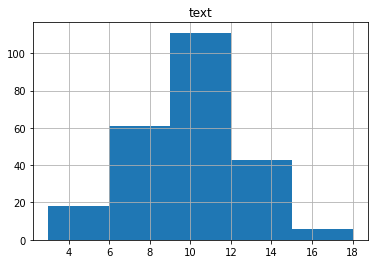

In [290]:
text_count = []

for sent in df_cp['clean_title']:
    text_count.append(len(sent.split()))
    


graph_df = pd.DataFrame() 

graph_df['text'] = text_count

graph_df.hist(bins = 5)
plt.show()

In [291]:
max_text_len=14

In [292]:
# Prepare a tokenizer, again -- by not considering the rare words
cap_tr_tokenizer = Tokenizer(num_words = tot_cnt) 
cap_tr_tokenizer.fit_on_texts(list(cap_train))

# Convert text sequences to integer sequences 
cap_tr_seq = cap_tr_tokenizer.texts_to_sequences(cap_train) 
cap_test_seq = cap_tr_tokenizer.texts_to_sequences(cap_test)

# Pad zero upto maximum length
cap_tr = pad_sequences(cap_tr_seq,  maxlen=max_text_len, padding='post')
cap_tested = pad_sequences(cap_test_seq, maxlen=max_text_len, padding='post')

# Size of vocabulary (+1 for padding token)
cap_voc = cap_tr_tokenizer.num_words + 1

print("Size of vocabulary in cap = {}".format(cap_voc))

Size of vocabulary in cap = 553


In [134]:
# # summarize vocabulary
# vocabulary = to_vocabulary(descriptions)
# print('Vocabulary Size: %d' % len(vocabulary))
# # save to file
# # save_descriptions(descriptions, 'descriptions.txt')

In [166]:
# load photo features
def load_photo_features(filename, dataset):
 # load all features
 all_features = load(open(filename, 'rb'))
 # filter features
 features = {k: all_features[k.split('.')[0]] for k in dataset}
 return features

In [282]:
train_features = load_photo_features('features.pkl', img_train)
print('Photos: train=%d' % len(train_features))

Photos: train=121


In [283]:
test_features = load_photo_features('features.pkl', img_test)
print('Photos: train=%d' % len(test_features))

Photos: train=31


In [284]:
print('Descriptions: train=%d' % len(cap_tr))

Descriptions: train=121


In [285]:
print('Descriptions: test=%d' % len(cap_test))

Descriptions: test=31


In [345]:
# cap_train

In [344]:
# train_features

In [301]:
	# for i in range(len(df_cp)):
	# 	print(df.loc[i, "sorted_imgs"], df.loc[i, "clean_title"])

In [296]:
img_train

126    502https-static01-nyt-com-images-2016-10-11-op...
31     117https-static01-nyt-com-images-2016-11-22-op...
120    476https-static01-nyt-com-images-2016-11-03-us...
136    535https-si-wsj-net-public-resources-images-bn...
121    479https-static01-nyt-com-images-2016-11-27-op...
                             ...                        
10     25https-static01-nyt-com-images-2016-11-26-us-...
152    608https-si-wsj-net-public-resources-images-bn...
92     363https-si-wsj-net-public-resources-images-bn...
183    767https-static01-nyt-com-images-2016-10-10-ar...
60     246https-si-wsj-net-public-resources-images-bn...
Name: sorted_imgs, Length: 121, dtype: object

In [378]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
# from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

def create_tokenizer(descriptions):
 tokenizer.fit_on_texts(list(descriptions))
 return tokenizer

def load_clean_descriptions(data, captions):
	# load document
	data=data.reset_index(drop=True)
	data=list(data)
	captions=captions.reset_index(drop=True)
	captions=list(captions)
	descriptions = dict()
	for i,val in enumerate(data):
			if val not in descriptions:
			 descriptions[val] = list()
			print(val)
			descriptions[val].append(captions[i])
	print(descriptions) 
	return descriptions
def create_sequences(tokenizer, max_length, descriptions,data, photos, vocab_size):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# print(key,desc_list)
		# walk through each description for the image
		for desc in desc_list:
			# print(desc,"desc")
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)

train_descriptions=load_clean_descriptions(img_train,cap_train)
test_descriptions=load_clean_descriptions(img_test,cap_test)

tokenizer = create_tokenizer(cap_train) 
vocab_size = len(tokenizer.word_index) + 1
X1train, X2train, ytrain = create_sequences(tokenizer, max_text_len, train_descriptions,img_train, train_features, vocab_size)
# print(X2train)
X1test, X2test, ytest = create_sequences(tokenizer, max_text_len, test_descriptions, img_test,test_features, vocab_size)

502https-static01-nyt-com-images-2016-10-11-opinion-10leonhardtnewsletterweb-10leonhardtnewsletterweb.jpg
117https-static01-nyt-com-images-2016-11-22-opinion-22cohen-22cohen-master768-jpg.jpg
476https-static01-nyt-com-images-2016-11-03-us-04poll1-04poll1-master768-jpg.jpg
535https-si-wsj-net-public-resources-images-bn-qd187-1005mc-h-20161005190747-jpg.jpg
479https-static01-nyt-com-images-2016-11-27-opinion-sunday-27sekaran-27sekaran-master768-jpg.jpg
136https-static01-nyt-com-images-2016-12-02-opinion-02ltweetsweb-02ltweetsweb-master768-jpg.jpg
583https-static01-nyt-com-images-2016-10-23-us-23fundraise-23fundraise-master768-jpg.jpg
403https-si-wsj-net-public-resources-images-bn-qw953-1121go-gr-20161121134033-jpg.jpg
876https-si-wsj-net-public-resources-images-bn-qv270-asuppl-p-20161116040857-jpg.jpg
102https-static01-nyt-com-images-2016-10-21-business-21visa2sub-21visa2sub-master768-jpg.jpg
511https-static01-nyt-com-images-2016-11-19-world-19nationstrump-19nationstrump-master768-jpg.jp

In [360]:
from keras.layers import concatenate
def define_model(vocab_size, max_length):
 # feature extractor model
 inputs1 = Input(shape=(4096,))
 fe1 = Dropout(0.5)(inputs1)
 fe2 = Dense(256, activation='relu')(fe1)
 # sequence model
 inputs2 = Input(shape=(max_length,))
 se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
 se2 = Dropout(0.5)(se1)
 se3 = LSTM(256)(se2)
 # decoder model
 decoder1 = concatenate([fe2, se3])
 decoder2 = Dense(256, activation='relu')(decoder1)
 outputs = Dense(vocab_size, activation='softmax')(decoder2)
 # tie it together [image, seq] [word]
 model = Model(inputs=[inputs1, inputs2], outputs=outputs)
 model.compile(loss='categorical_crossentropy', optimizer='adam')
 # summarize model
 print(model.summary())
 plot_model(model, to_file='model.png', show_shapes=True)
 return model

In [379]:
X2train

array([[  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   1,   5],
       [  0,   0,   0, ...,   1,   5,   3],
       ...,
       [  0,   0,   0, ..., 563, 564,   3],
       [  0,   0,   0, ..., 564,   3, 565],
       [  0,   0,   0, ...,   3, 565,   4]], dtype=int32)

In [381]:
model = define_model(vocab_size, max_text_len)
# define checkpoint callback
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
model.fit([X1train, X2train], ytrain, epochs=20, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 14)]         0           []                               
                                                                                                  
 input_21 (InputLayer)          [(None, 4096)]       0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 14, 256)      145664      ['input_22[0][0]']               
                                                                                                  
 dropout_20 (Dropout)           (None, 4096)         0           ['input_21[0][0]']               
                                                                                            

In [386]:
real_news_df.to_csv("real_news",index=False)

In [388]:
fake_news_cp=df_cp[df_cp["type"]=="fake"]

In [400]:
# fake_news_cp

In [396]:
eval_df_1=pd.DataFrame({"img_test":img_test,"cap_test":cap_test})

In [397]:
eval_df_2=pd.DataFrame({"img_test":fake_news_cp["sorted_imgs"],"cap_test":fake_news_cp['clean_title']})

In [398]:
final_eval = pd.concat([eval_df_1, eval_df_2])

In [399]:
final_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 145 to 233
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_test  118 non-null    object
 1   cap_test  118 non-null    object
dtypes: object(2)
memory usage: 2.8+ KB


In [405]:
eval_features = load_photo_features('features.pkl', final_eval["img_test"])

In [ ]:
print('Photos: eval=%d' % len(eval_features))

In [407]:
from numpy import argmax
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu


# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'starttoken'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endtoken':
			break
	return in_text

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))



# prepare test set


test_descriptions = load_clean_descriptions(final_eval["img_test"],final_eval["cap_test"])
print('Descriptions: test=%d' % len(test_descriptions))

# load the model
filename = 'model-ep002-loss4.994-val_loss4.394.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, eval_features, tokenizer, max_text_len)

570https-si-wsj-net-public-resources-images-bn-qz822-1130ca-gr-20161130094057-jpg.jpg
235https-si-wsj-net-public-resources-images-bn-ql845-reynol-gr-20161026082855-jpg.jpg
338https-si-wsj-net-public-resources-images-bn-qs637-nyjers-gr-20161109173627-jpg.jpg
125https-si-wsj-net-public-resources-images-bn-qw306-ford5j-gr-20161118104510-jpg.jpg
590https-si-wsj-net-public-resources-images-bn-qs471-botwt1-gr-20161109123033-jpg.jpg
196https-static01-nyt-com-images-2016-11-10-world-10cohen-inyt-10cohen-inyt-master768-jpg.jpg
475https-si-wsj-net-public-resources-images-bn-qd835-rogues-p-20161007104742-jpg.jpg
19https-si-wsj-net-public-resources-images-bn-qq640-votele-gr-20161106145244-jpg.jpg
736https-static01-nyt-com-images-2016-10-11-upshot-12up-finnegan-1-12up-finnegan-1-master768-jpg.jpg
279https-static01-nyt-com-images-2016-10-08-us-09roadtrip-sara-09roadtrip-videostill-master675-jpg.jpg
219https-si-wsj-net-public-resources-images-bn-qg363-1013li-gr-20161013173432-jpg.jpg
798https-si-wsj-

In [408]:
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [410]:
def extract_features_eval(filename):
 # load the model
 model = VGG16()
 # re-structure the model
 model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
 # load the photo
 image = load_img(filename, target_size=(224, 224))
 # convert the image pixels to a numpy array
 image = img_to_array(image)
 # reshape data for the model
 image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
 # prepare the image for the VGG model
 image = preprocess_input(image)
 # get features
 feature = model.predict(image, verbose=0)
 return feature

In [424]:
photo = extract_features_eval('content/images_new/102https-static01-nyt-com-images-2016-10-21-business-21visa2sub-21visa2sub-master768-jpg.jpg')

In [425]:
description = generate_desc(model, tokenizer, photo, max_text_len)

In [426]:
description

'starttoken trump trump u u u u u endtoken'

In [427]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 14)]         0           []                               
                                                                                                  
 input_21 (InputLayer)          [(None, 4096)]       0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 14, 256)      145664      ['input_22[0][0]']               
                                                                                                  
 dropout_20 (Dropout)           (None, 4096)         0           ['input_21[0][0]']               
                                                                                            